In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
mushrooms = pd.read_csv('../data/mushrooms.csv', encoding = "ISO-8859-1")

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms.shape

(8124, 23)

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushrooms['class'].unique()

array(['p', 'e'], dtype=object)

**From the above code we can see there are 2 classes of Mushrooms - Poisonous and Edible.**

## Exploratory Data Analysis

In the EDA step, We visualize each feature by its class distribution. The "class" refers that the information of this mushroom is edible or poisonous.

### Mushroom Class

In [8]:
labels = ['Edible', 'Poisonous']
values = [mushrooms.describe()['class']['freq'], mushrooms.describe()['class']['count']-mushrooms.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

### Cap Shapes

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

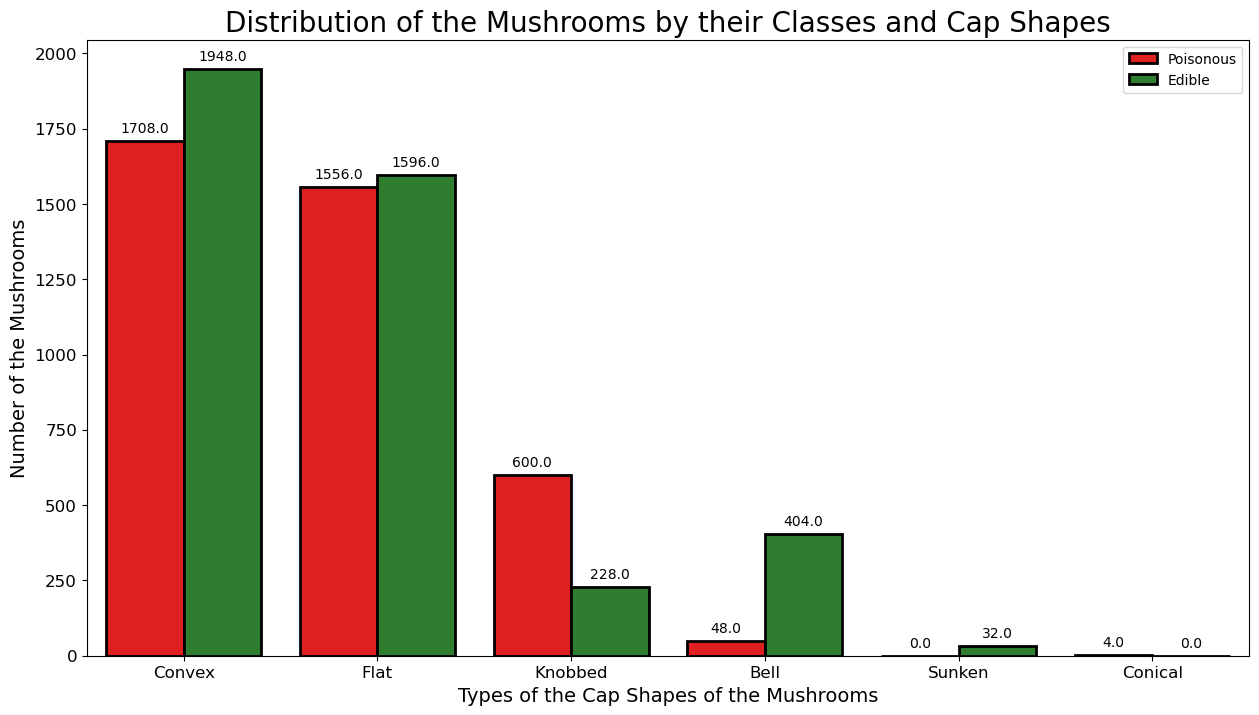

In [9]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='cap-shape',
                      hue='class',
                      order=mushrooms['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

### Cap Surfaces 

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

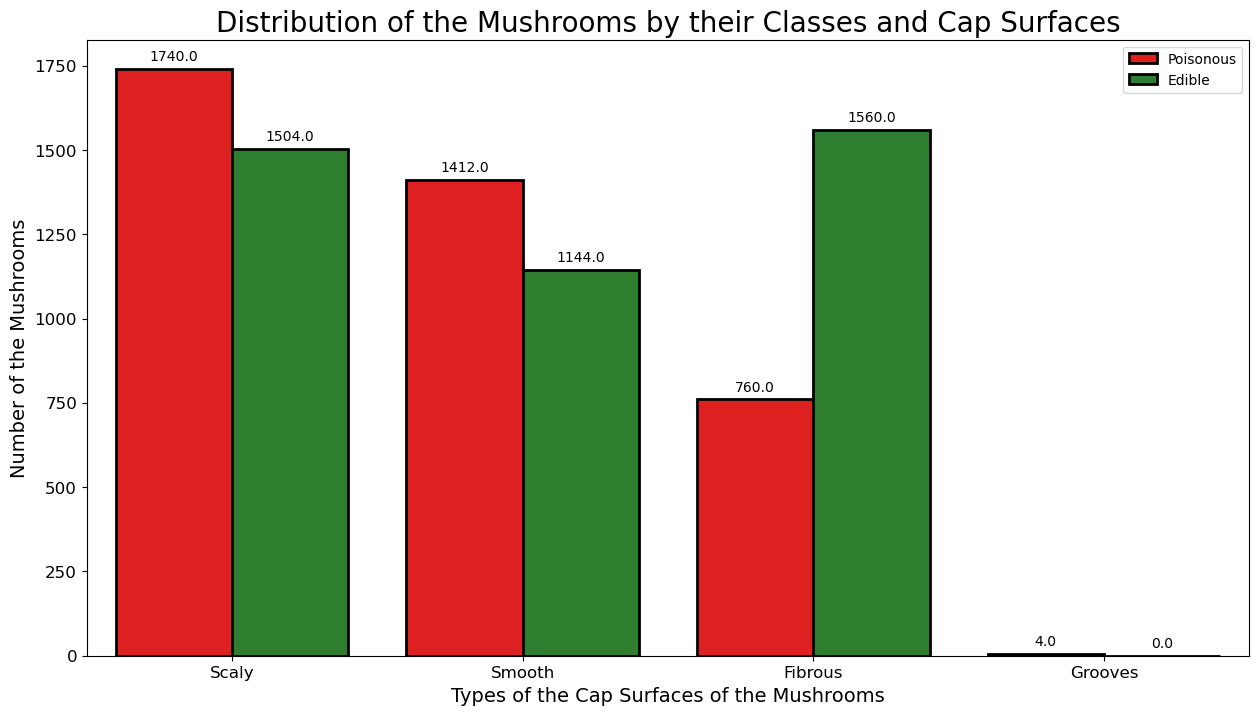

In [10]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='cap-surface',
                      hue='class',
                      order=mushrooms['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

### Cap Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

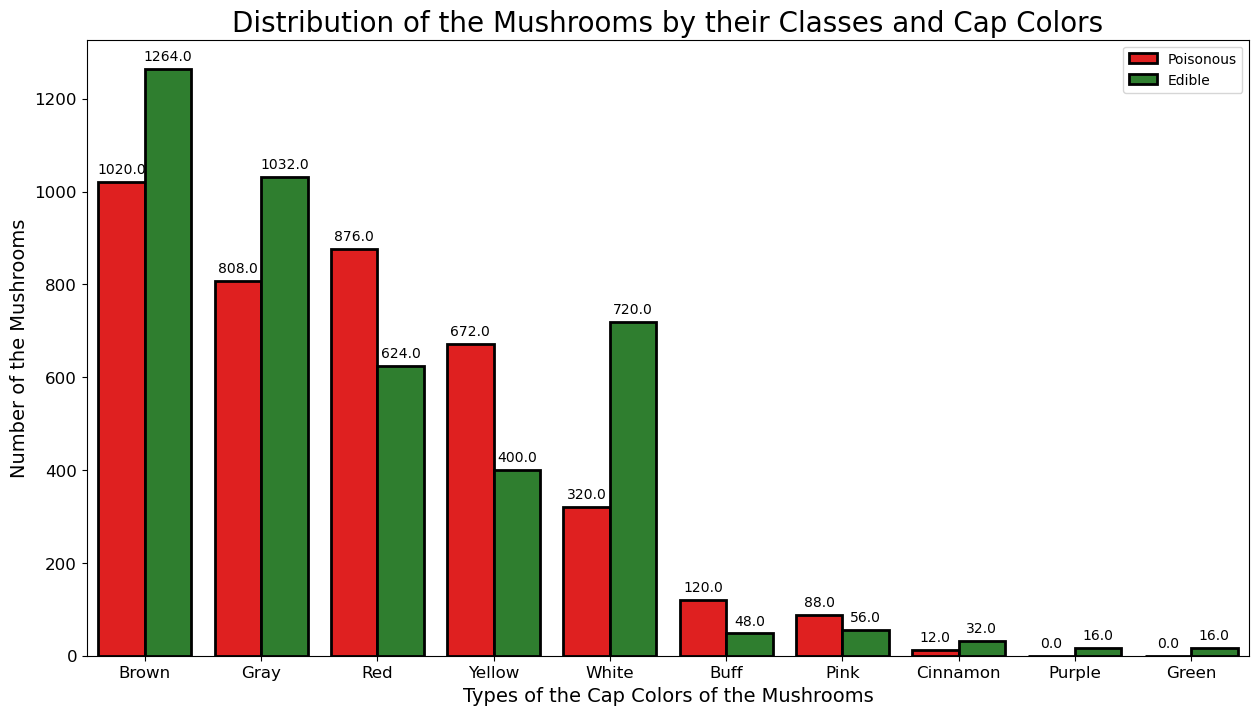

In [11]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='cap-color',
                      hue='class',
                      order=mushrooms['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

### Bruises

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Bruises')

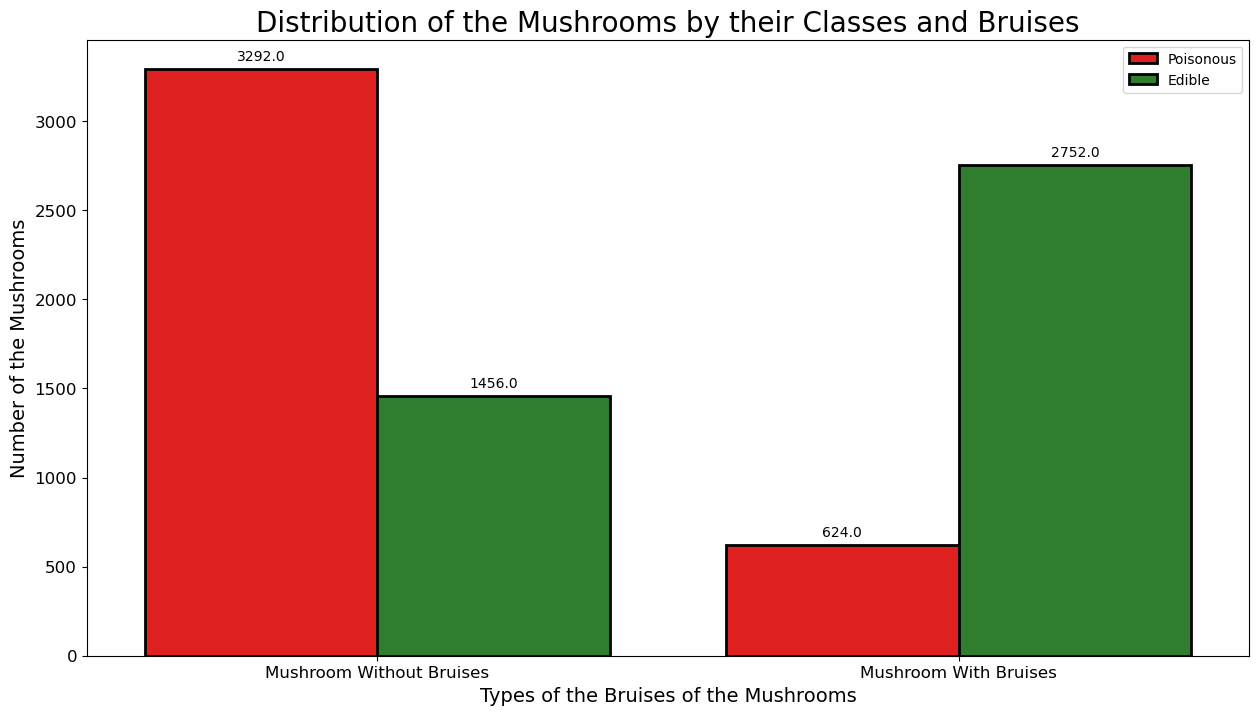

In [12]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='bruises',
                      hue='class',
                      order=mushrooms['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushroom Without Bruises', 'Mushroom With Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Bruises of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Bruises', fontsize=20)

### Odor

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Odor')

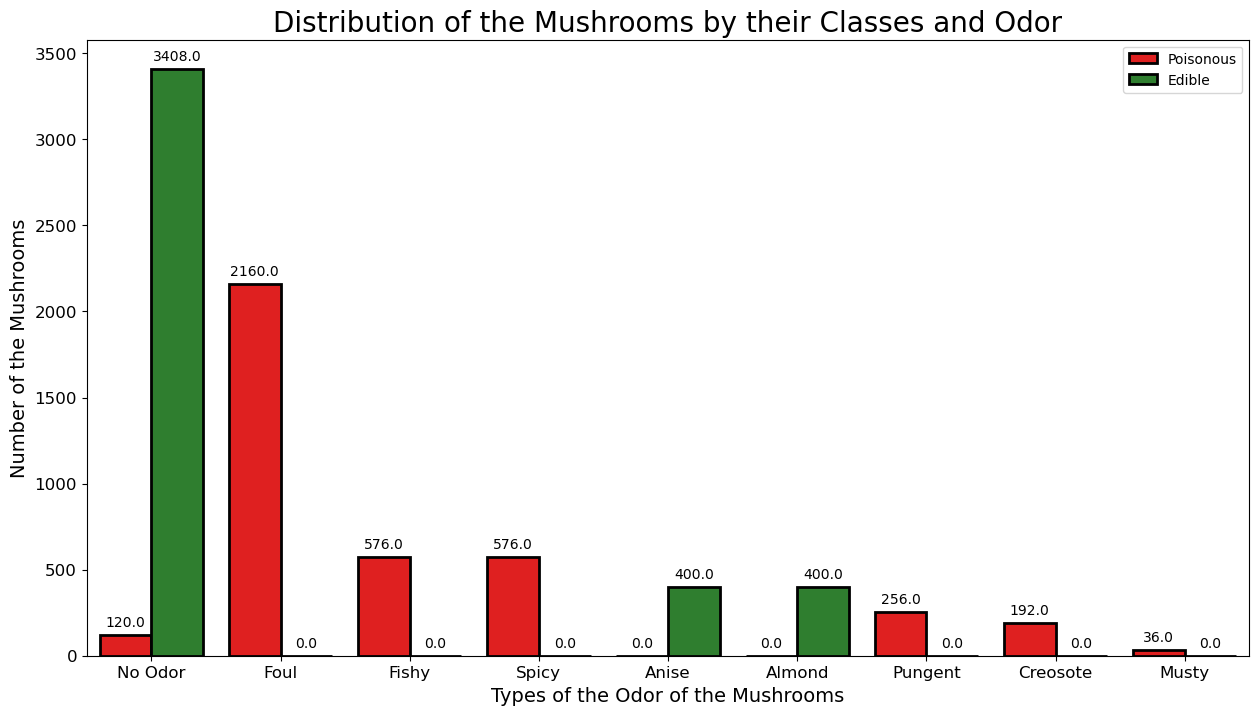

In [13]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='odor',
                      hue='class',
                      order=mushrooms['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent', 'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Odor', fontsize=20)

### Gill Attachment

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Attachment')

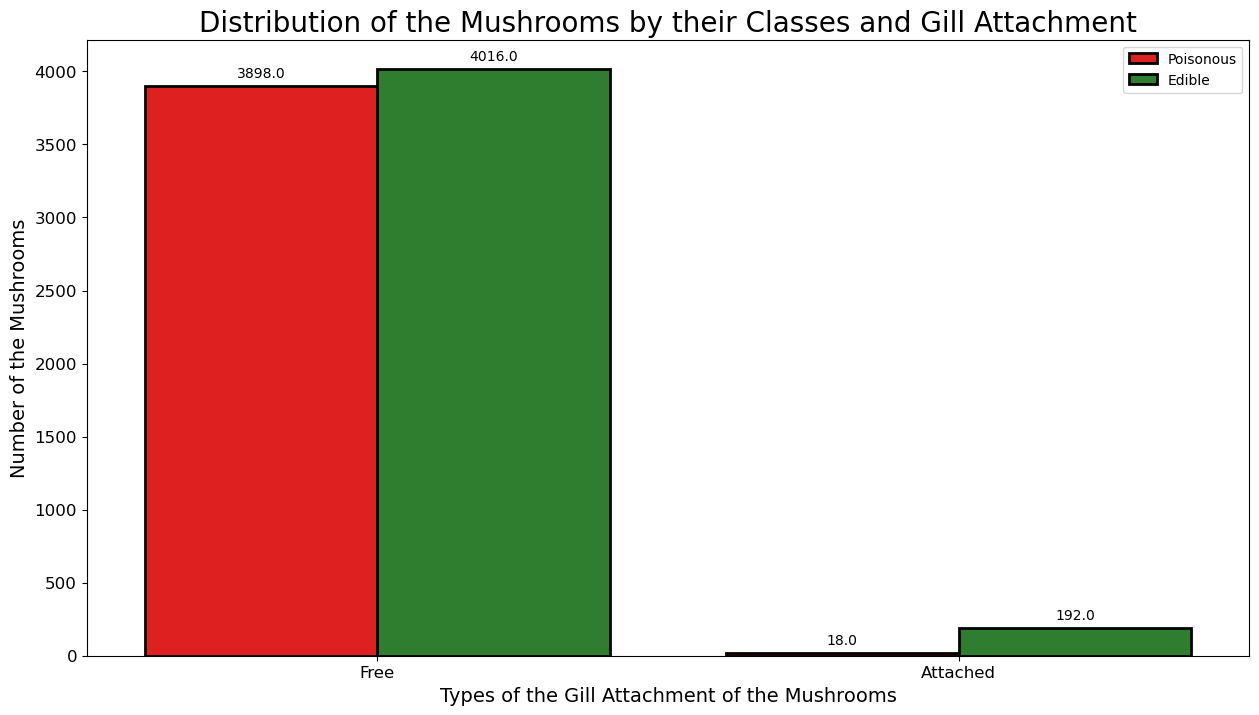

In [14]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-attachment',
                      hue='class',
                      order=mushrooms['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachment of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Attachment', fontsize=20)

### Gill Spacing

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Spacing')

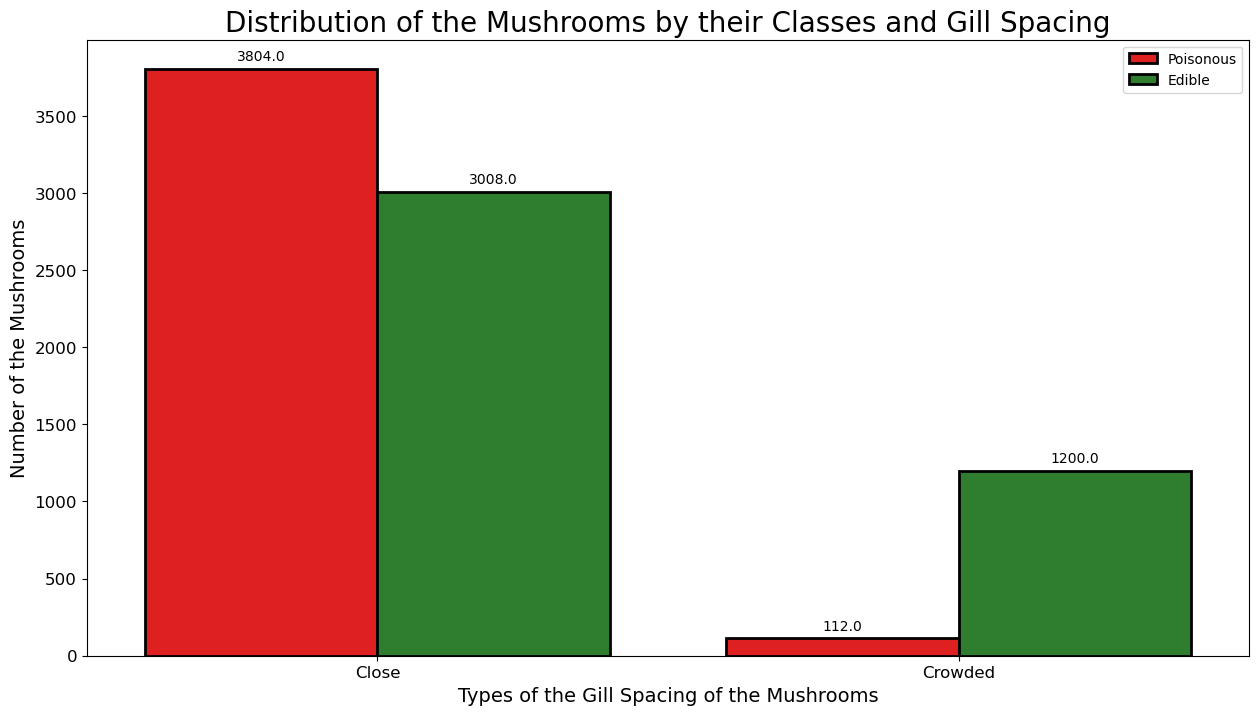

In [15]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-spacing',
                      hue='class',
                      order=mushrooms['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Spacing', fontsize=20)

### Gill Color

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Colors')

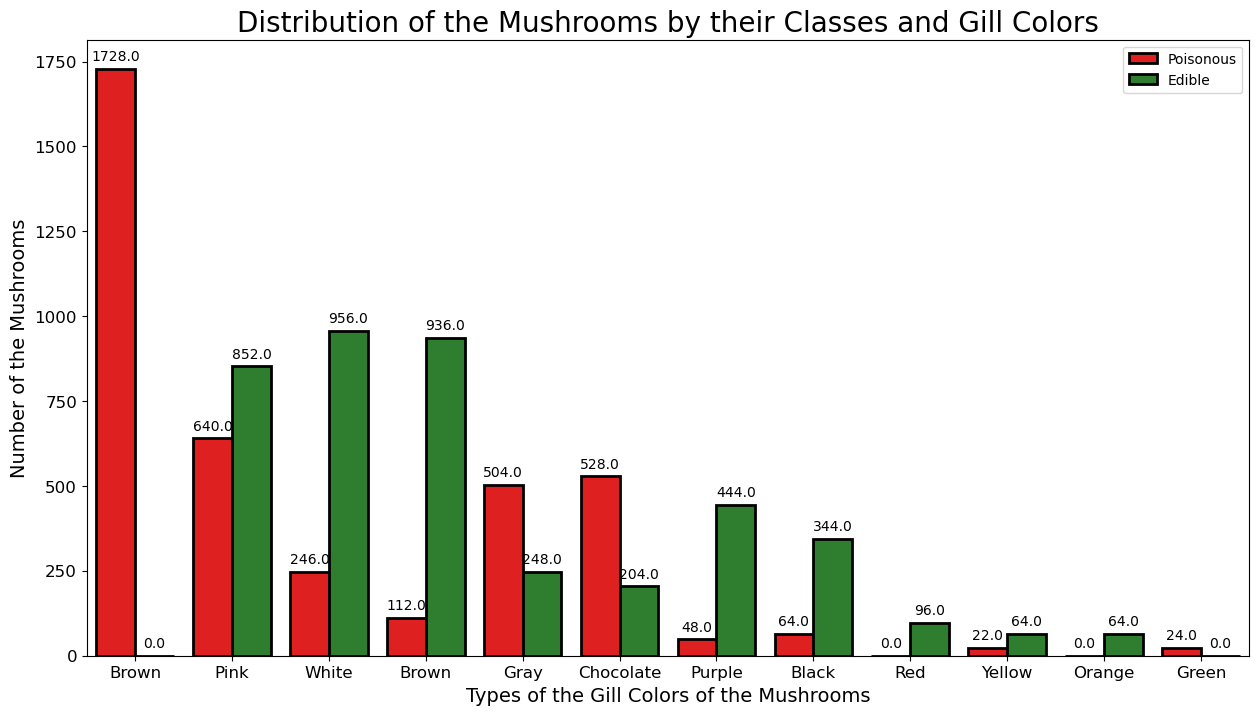

In [16]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='gill-color',
                      hue='class',
                      order=mushrooms['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red', 'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Colors', fontsize=20)

### Stalk Shape

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Shape')

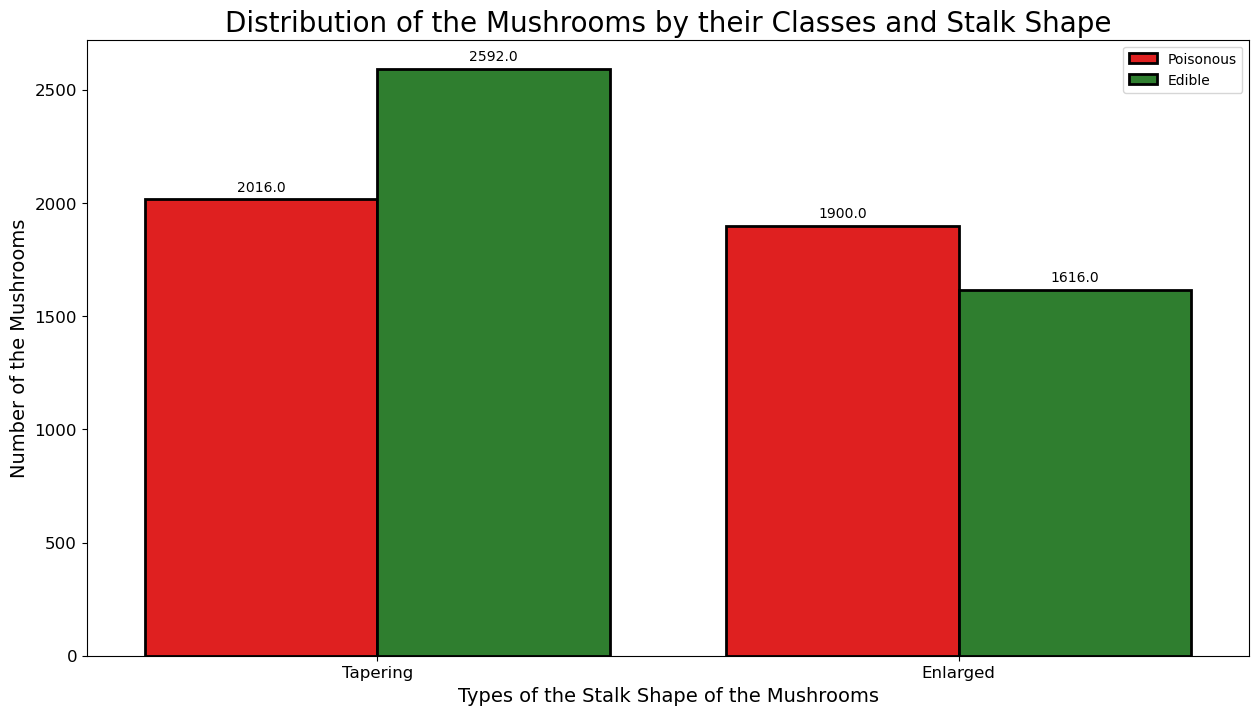

In [17]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-shape',
                      hue='class',
                      order=mushrooms['stalk-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarged'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shape of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Shape', fontsize=20)

### Stalk Root

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Root')

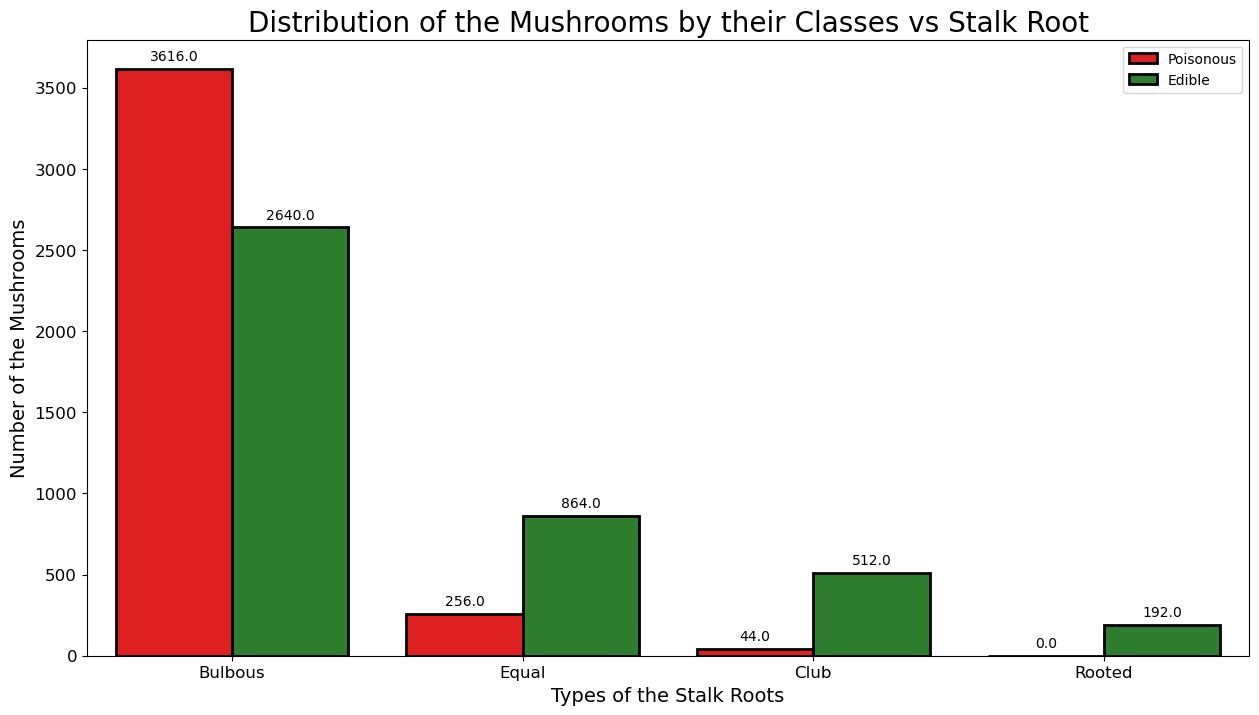

In [18]:
# The stalk-root feature has missing values. I filled the missing values with the most frequent object which is 'b'.
data = mushrooms.replace(['?'], 'b')

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='stalk-root',
                      hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Root', fontsize=20)

### Stalk Surface Above and Below Ring

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Surface Above the Ring')

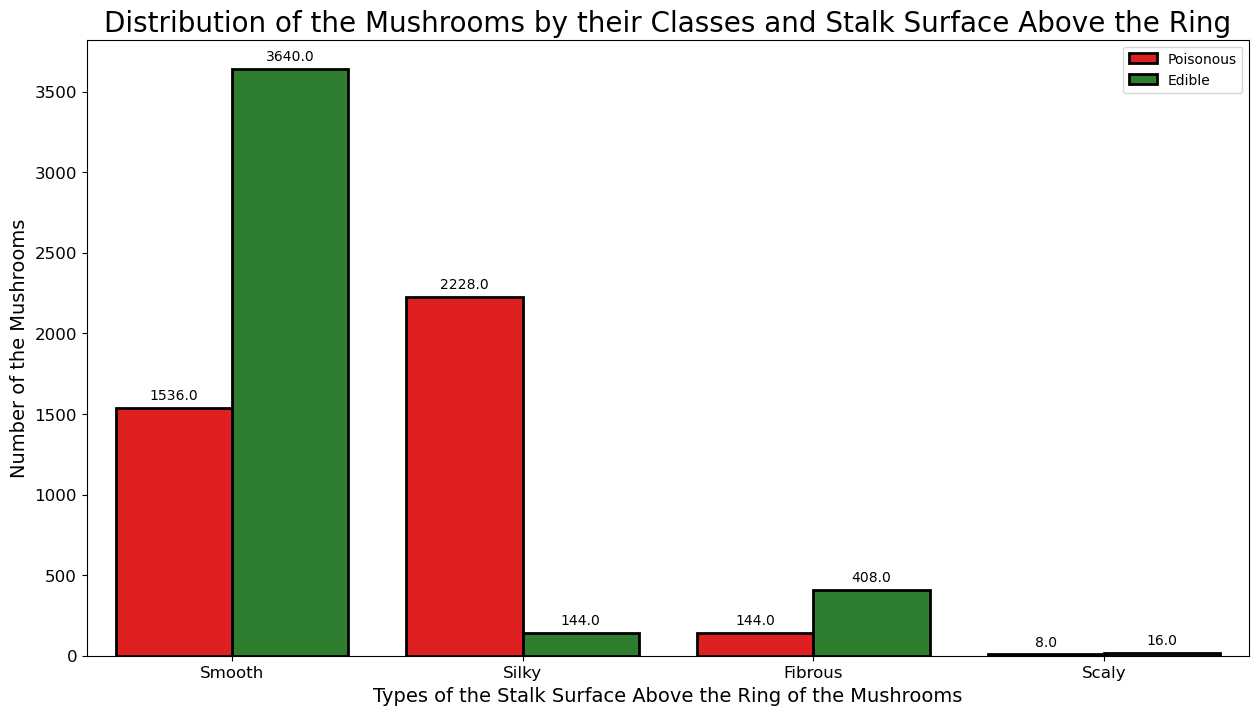

In [19]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-surface-above-ring',
                      hue='class',
                      order=mushrooms['stalk-surface-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surface Above the Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Surface Above the Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalk Surface Below the Ring')

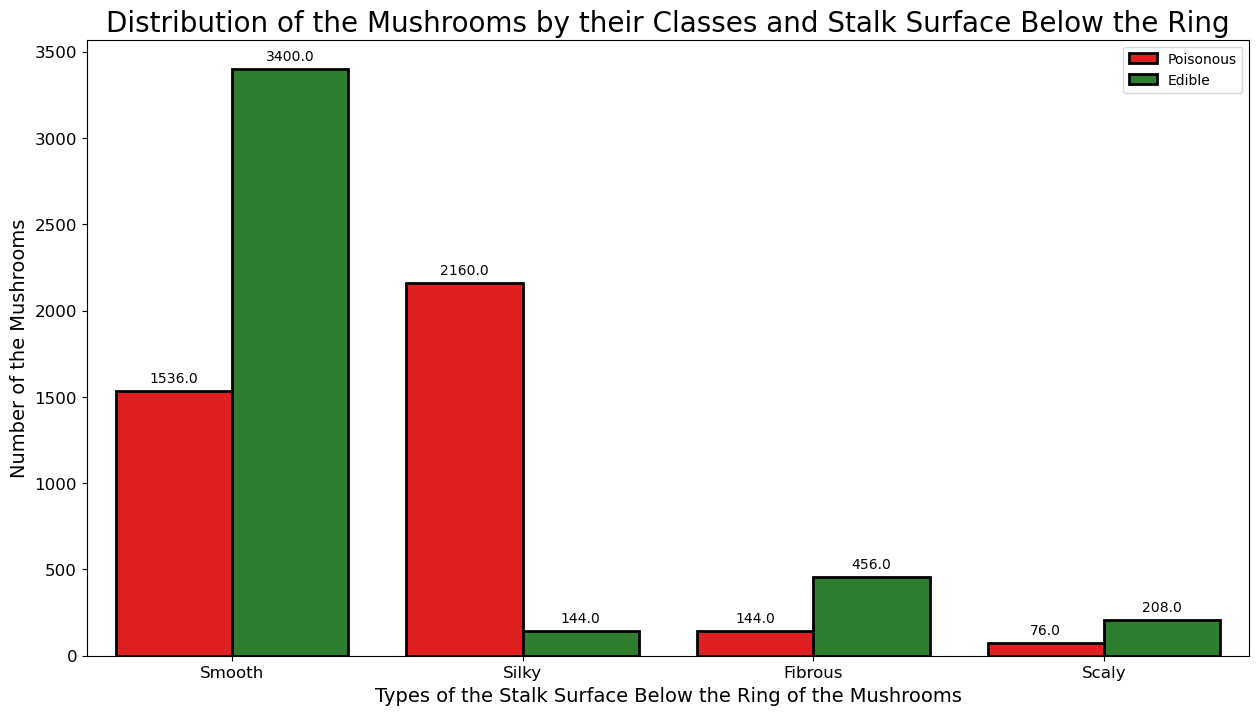

In [20]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='stalk-surface-below-ring',
                      hue='class',
                      order=mushrooms['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surface Below the Ring of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalk Surface Below the Ring', fontsize=20)

### Veil Types

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Viel Type')

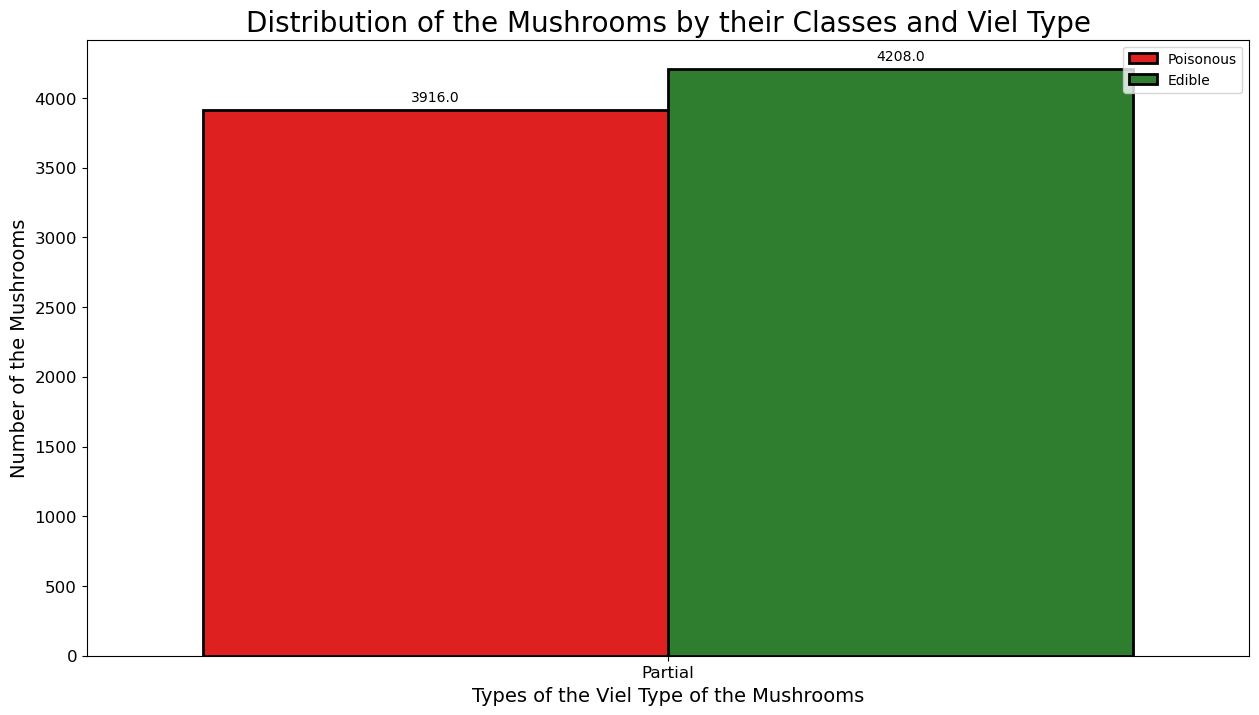

In [21]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='veil-type',
                      hue='class',
                      order=mushrooms['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Partial'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Viel Type of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Viel Type', fontsize=20)

### Veil Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Veil Colors')

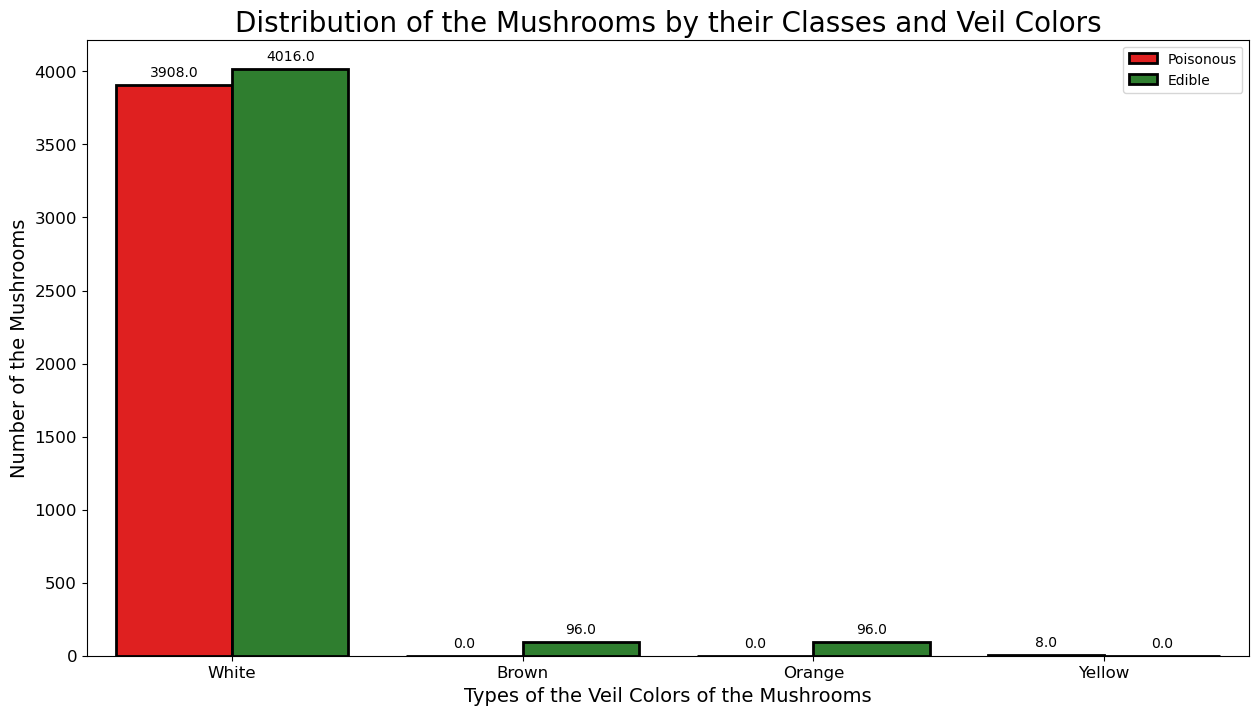

In [22]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='veil-color',
                      hue='class',
                      order=mushrooms['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veil Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Veil Colors', fontsize=20)

### Number of the Rings

In [23]:
x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [[mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[2],
      mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[0],
      mushrooms[mushrooms['class'] == 'p']['ring-number'].value_counts()[1]],
     [0, mushrooms[mushrooms['class'] == 'e']['ring-number'].value_counts()[0],
      mushrooms[mushrooms['class'] == 'e']['ring-number'].value_counts()[1]]
     ]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='magma')
fig.update_layout(title_text='Heatmap of the Mushrooms by their Classes vs Number of the Rings',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(xaxis=dict(
    tickfont=dict(size=15),
),
    yaxis=dict(tickfont=dict(size=15)))
fig.show()

### Ring Type

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Ring Type')

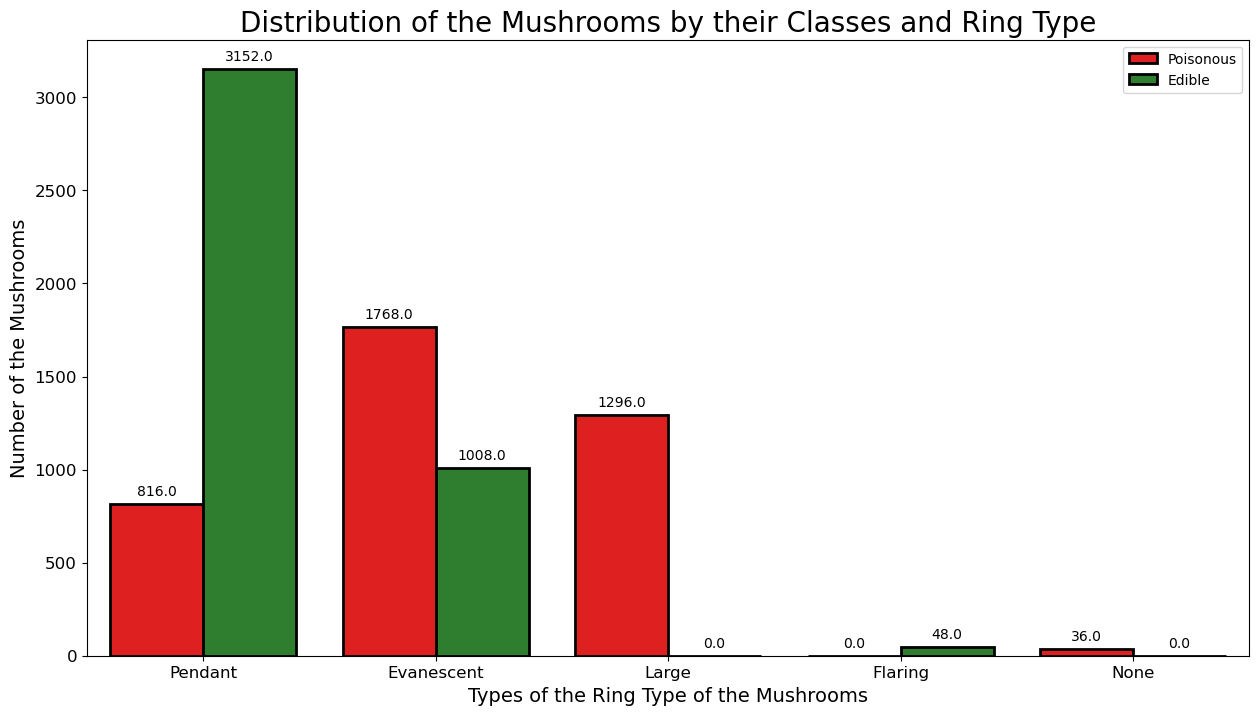

In [24]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='ring-type',
                      hue='class',
                      order=mushrooms['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Ring Type of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Ring Type', fontsize=20)

### Spore Print Colors

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Spore Print Color')

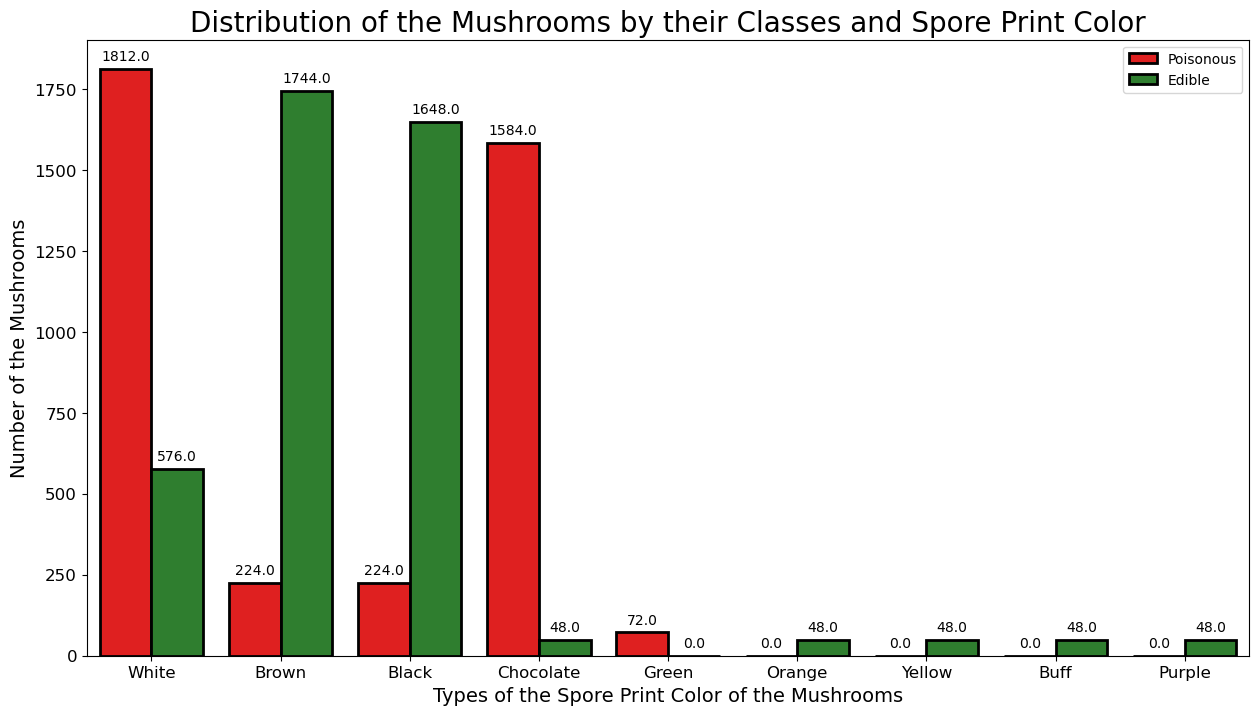

In [25]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='spore-print-color',
                      hue='class',
                      order=mushrooms['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Spore Print Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Spore Print Color', fontsize=20)

### Population

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Population')

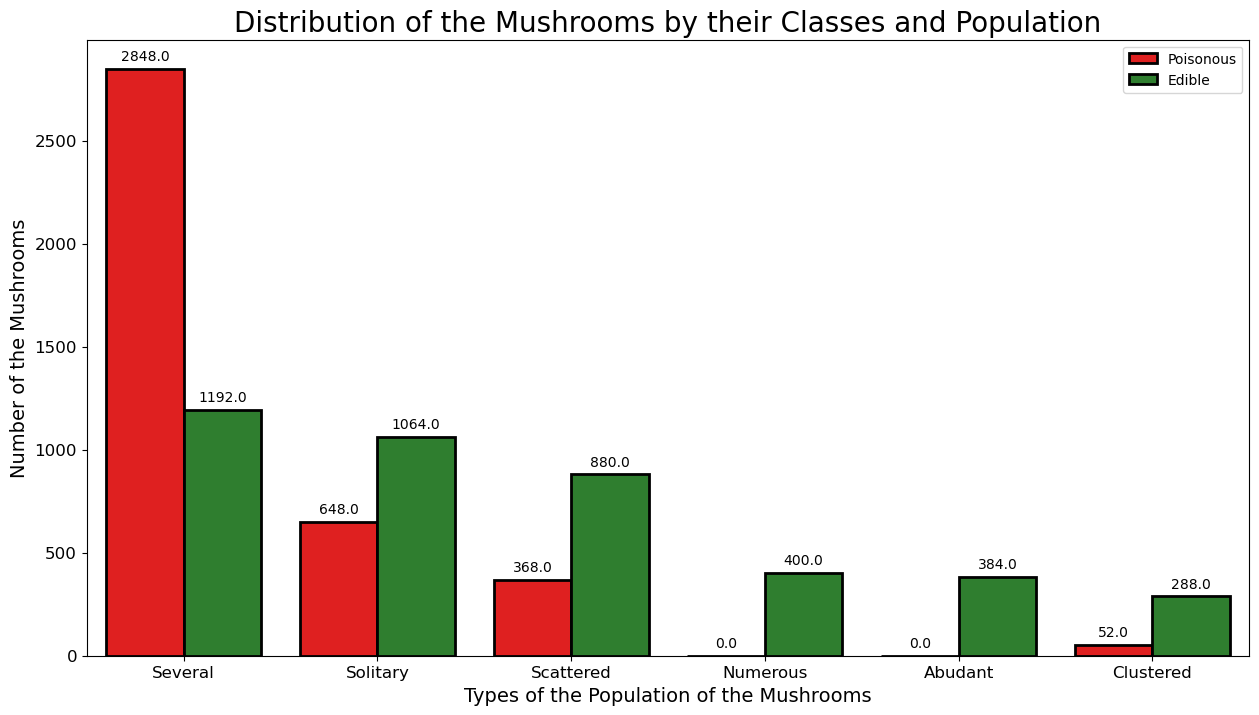

In [26]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='population',
                      hue='class',
                      order=mushrooms['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abudant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Population of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Population', fontsize=20)

### Habitats

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Habitat')

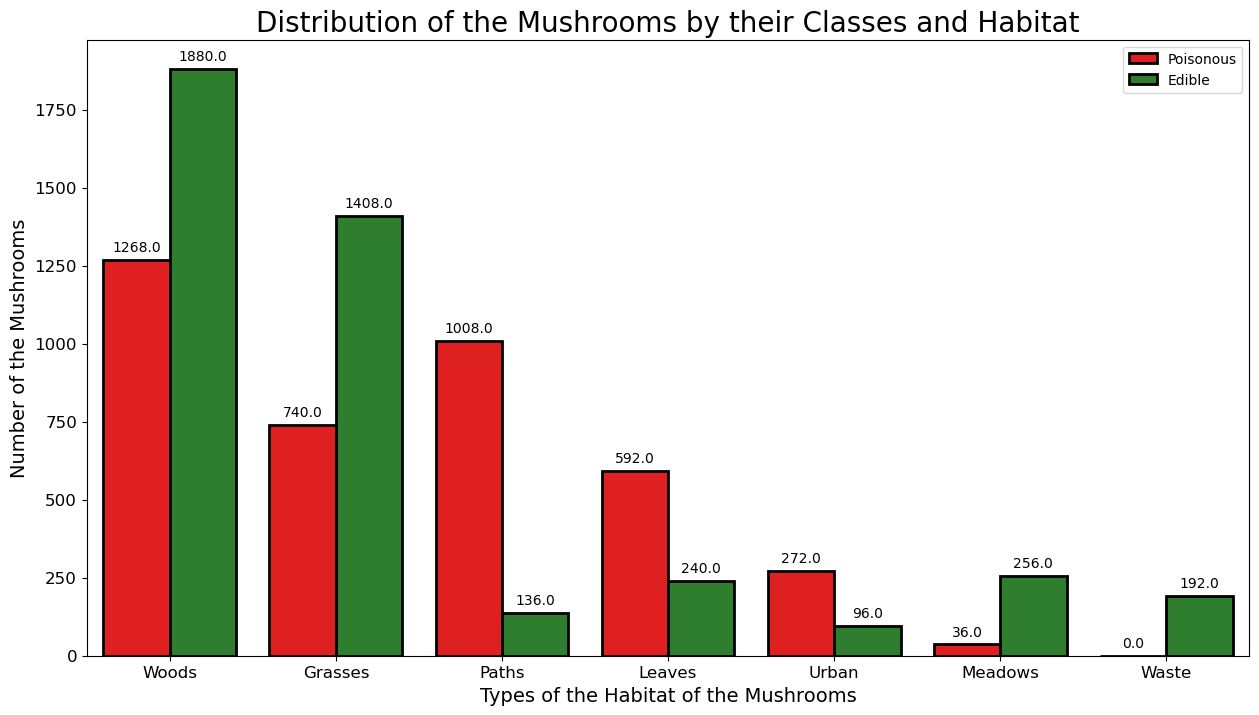

In [27]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushrooms, x='habitat',
                      hue='class',
                      order=mushrooms['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Habitat of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Habitat', fontsize=20)

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [29]:
X = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

### After converting categorical data to numerical data we can see Veil Type is not contributing to the data hence it can be dropped.

In [30]:
mushrooms = mushrooms.drop(["veil-type"],axis=1)

In [31]:
X_temp = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, label only

In [32]:
X_temp.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [33]:
X_temp.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


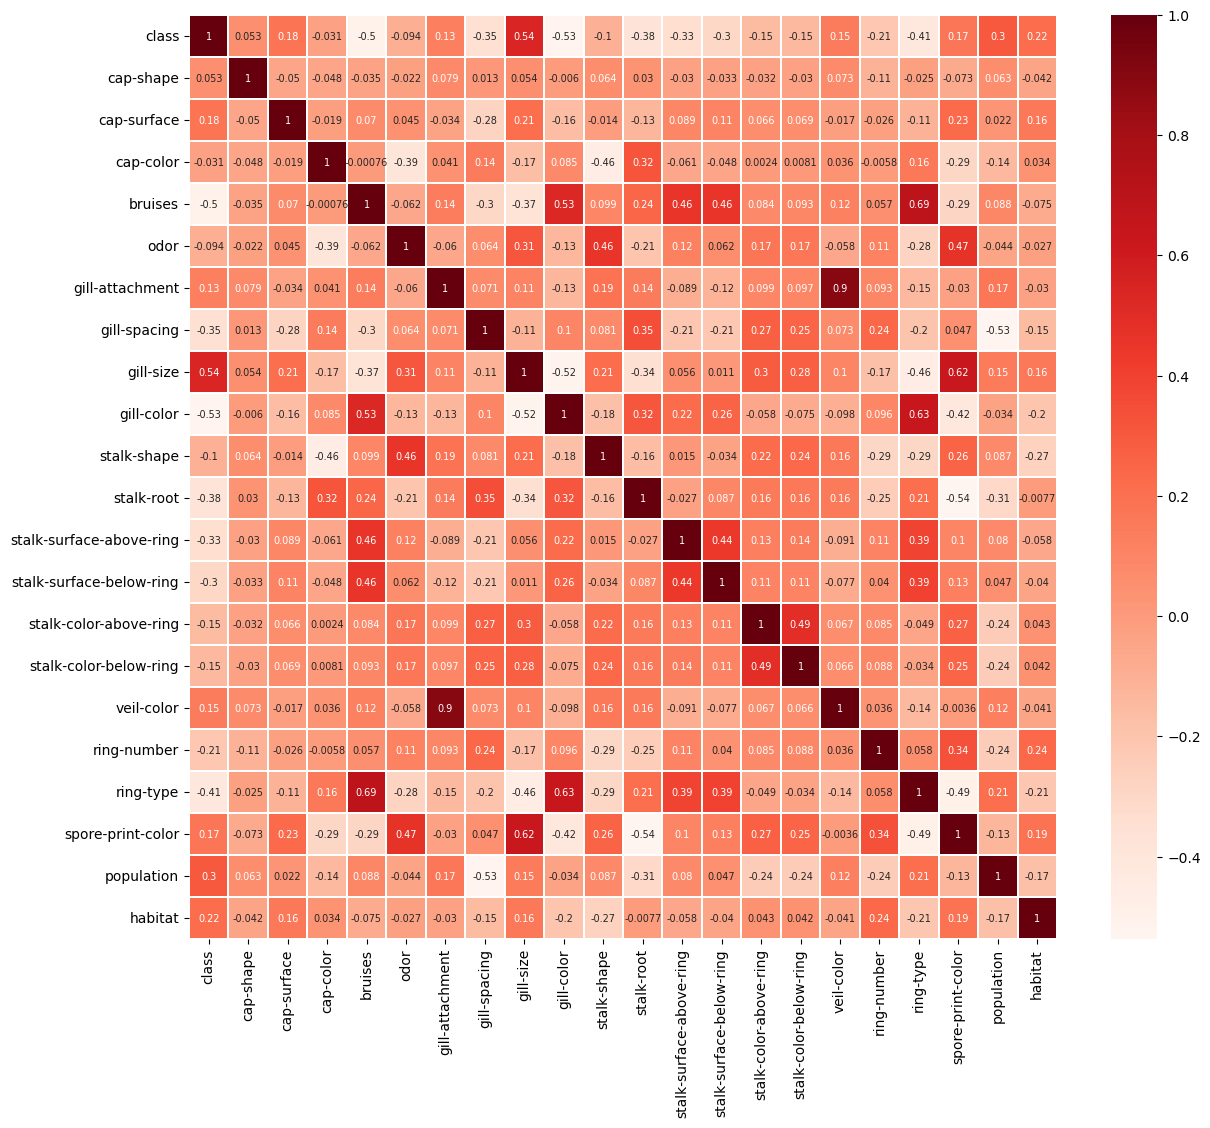

In [34]:
plt.figure(figsize=(14,12))
sns.heatmap(mushrooms.corr(),linewidths=.1,cmap="Reds", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [35]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_temp = scaler.fit_transform(X_temp)

## PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_temp)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.35978246,
        -0.20858136,  0.00813997],
       [-2.2821023 ,  0.27906633, -1.20049669, ...,  0.27853175,
         0.15223879, -0.19644613],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.36488219,
         0.25758178, -0.3625772 ],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ...,  0.11623201,
        -1.42532241,  0.63699012],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ...,  0.21603033,
         0.09414401, -0.06434622],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.87529438,
        -0.80462606,  0.59031526]])

In [37]:
covariance=pca.get_covariance()

In [38]:
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924, 2.60339434, 2.40073834, 2.16674719, 1.70303181,
       1.39495575, 0.97880367, 0.95193684, 0.7700364 , 0.71174835,
       0.57755653, 0.54248485, 0.50963127, 0.47721409, 0.3844672 ,
       0.31122823, 0.21864966, 0.15951488, 0.13152169, 0.07319935,
       0.06161557])

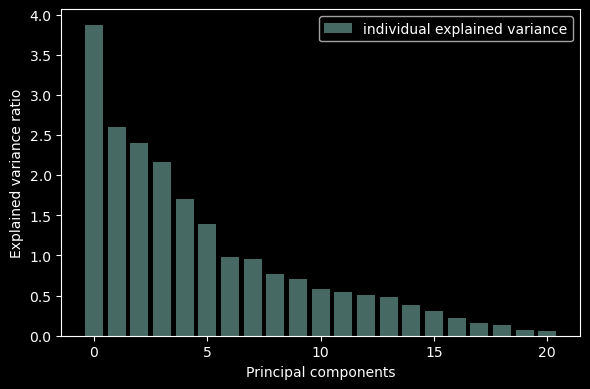

In [39]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(21), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [183]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
        # Calculate ROC curve and AUC for training data
        y_train_prob = classifier.predict_proba(X_train)[:, 1]
        y_train_pred = np.where(y_train_prob > 0.5, 1, 0)
        auc_roc_train=roc_auc_score(y_train,y_train_pred)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_train))
        false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_train_prob)
        roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
        print("Confusion Matrix:\n")
        sns.heatmap(confusion_matrix(y_train,classifier.predict(X_train)), square = True, annot = True, fmt = 'd', cbar = False)
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.title(classifier)
        #Plot ROC curve for training data
        plt.figure(figsize=(10,10))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_train,true_positive_rate_train, color='red',label = 'AUC = %0.2f' % roc_auc_train)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        # Calculate ROC curve and AUC for test data
        y_test_prob = classifier.predict_proba(X_test)[:, 1]
        y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
        auc_roc_test=roc_auc_score(y_test,y_test_pred)
        print('ROC AUC Score:\t{0:.4f}\n'.format(auc_roc_test))
        false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_prob)
        roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
        print("Confusion Matrix:\n")
        sns.heatmap(confusion_matrix(y_test,classifier.predict(X_test)), square = True, annot = True, fmt = 'd', cbar = False)
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.title(classifier)
        # Plot ROC curve for test data
        plt.figure(figsize=(10,10))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate_test,true_positive_rate_test, color='red',label = 'AUC = %0.2f' % roc_auc_test)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

In [184]:
# Plot loss function

def plotter(tr_model):
  plt.plot(tr_model.history['accuracy'], color = "blue", label = "train")
  plt.plot(tr_model.history['val_accuracy'], color = "red", label = "validation")

  plt.title("Learning curves")
  plt.ylabel("Accuracy")
  plt.xlabel("Number of epochs")
  plt.grid()
  plt.legend()
  plt.show()

### N = 7

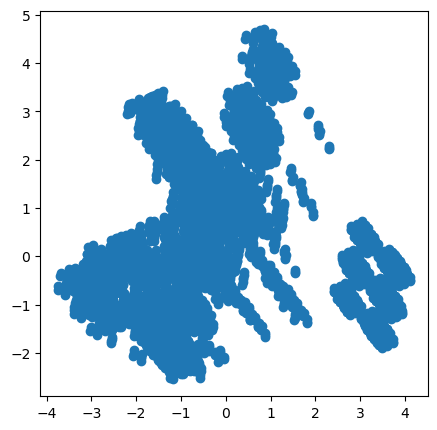

In [185]:
# N=X_temp.values
pca = PCA(n_components=7)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

Training results:

Accuracy Score: 0.9023

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2478
           1       0.93      0.87      0.90      2396

    accuracy                           0.90      4874
   macro avg       0.90      0.90      0.90      4874
weighted avg       0.90      0.90      0.90      4874


Average Accuracy:	0.9011

Standard Deviation:	0.0174
ROC AUC Score:	0.9017

Confusion Matrix:



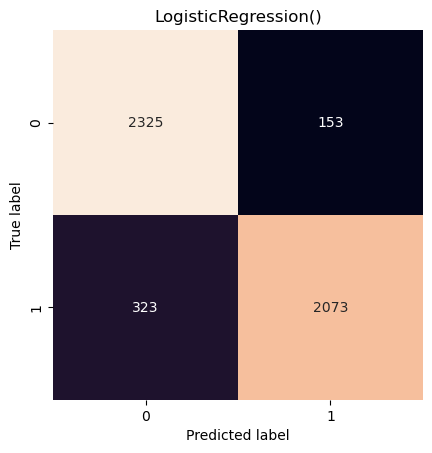

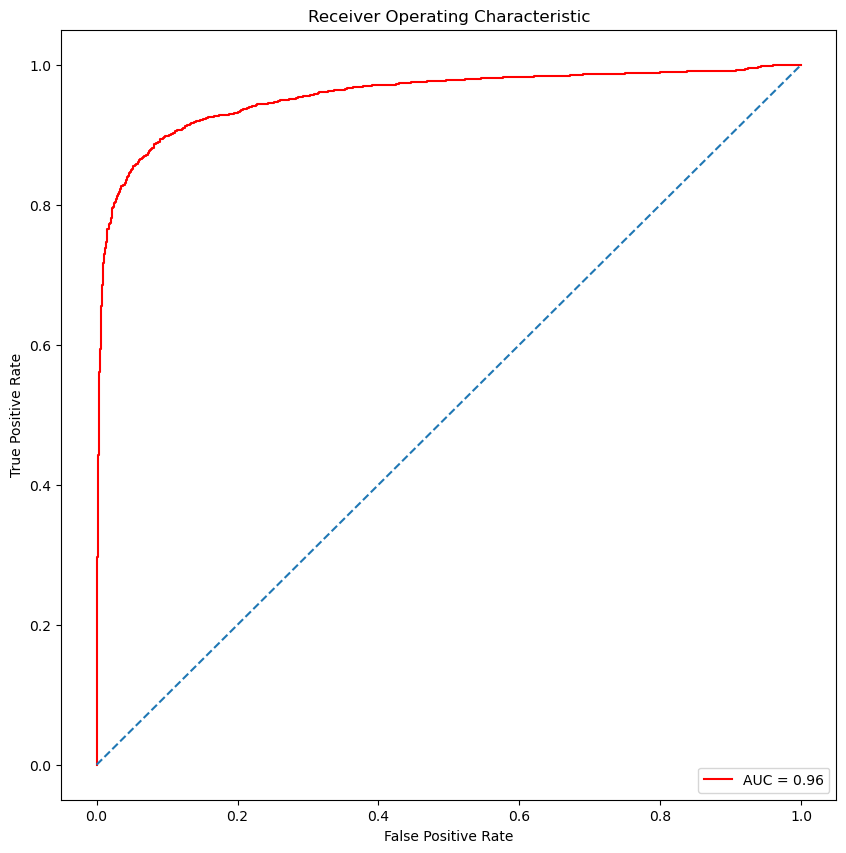

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Test results:

Accuracy Score: 0.8920

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1730
           1       0.92      0.84      0.88      1520

    accuracy                           0.89      3250
   macro avg       0.90      0.89      0.89      3250
weighted avg       0.89      0.89      0.89      3250


ROC AUC Score:	0.8888

Confusion Matrix:



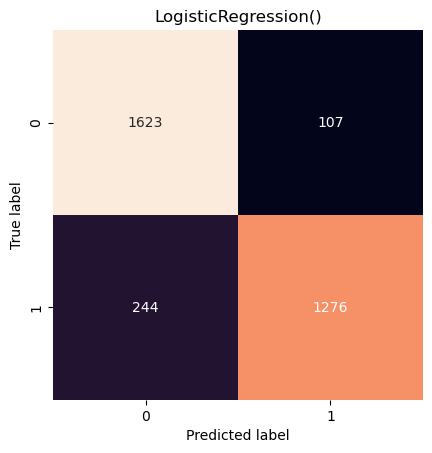

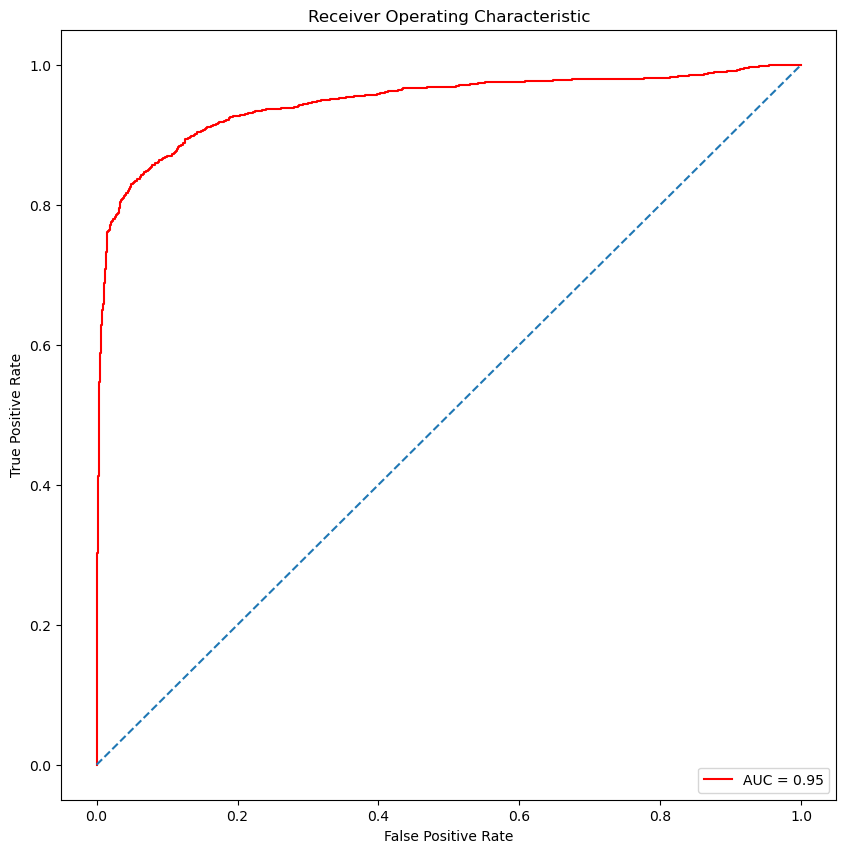

In [188]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

### ANN

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
488/488 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8428 - val_loss: 0.3431 - val_accuracy: 0.9028
Epoch 2/25
488/488 [==============================] - 1s 1ms/step - loss: 0.3060 - accuracy: 0.9194 - val_loss: 0.2866 - val_accuracy: 0.9145
Epoch 3/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2642 - accuracy: 0.9251 - val_loss: 0.2555 - val_accuracy: 0.9255
Epoch 4/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2368 - accuracy: 0.9315 - val_loss: 0.2303 - val_accuracy: 0.9243
Epoch 5/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.9341 - val_loss: 0.2128 - val_accuracy: 0.9262
Epoch 6/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2013 - accuracy: 0.9350 - val_loss: 0.2000 - val_accuracy: 0.9298
Epoch 7/25
488/488 [==============================] - 1s 1ms/step - loss: 0.1908 - accuracy: 0.9372 - val_loss: 0.1912 - val_accuracy: 0.9311
Epoch 

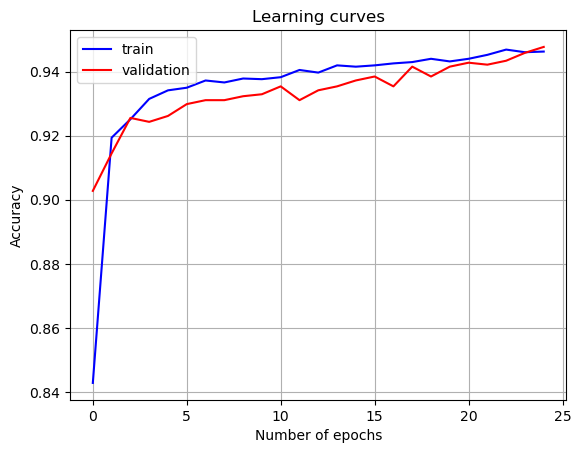

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.1558
Test accuracy: 93.29


51/51 [==============================] - 0s 739us/step


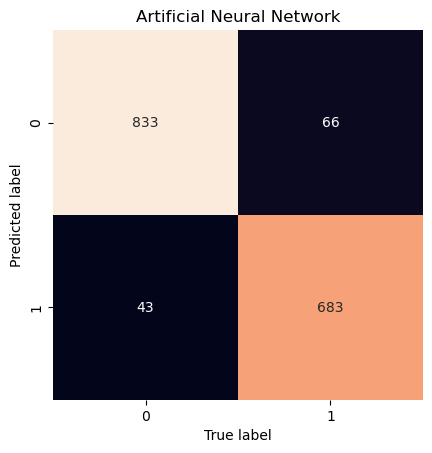

In [ ]:
# Create a function which takes a model and prints various evaluation metrics

import seaborn as sns
from sklearn import metrics

def evaluate(mlp, titlemsg):
  y_predicted = mlp.predict(X_test)
  y_predicted = y_predicted > 0.5
  mat = metrics.confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title(titlemsg)
evaluate(model, "Artificial Neural Network")

### K Nearest Mean

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 0.9979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Confusion Matrix:
[[2476    2]
 [   8 2388]]

Average Accuracy:	0.9969

Standard Deviation:	0.0028


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9951

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1730
           1       1.00      0.99      0.99      1520

    accuracy                           1.00      3250
   macro avg       1.00      0.99      1.00      3250
weighted avg       1.00      1.00      1.00      3250


Confusion Matrix:
[[1726    4]
 [  12 1508]]



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Confusion Matrix:
[[2478    0]
 [   0 2396]]

Average Accuracy:	0.9908

Standard Deviation:	0.0041


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9886

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1730
           1       0.99      0.99      0.99      1520

    accuracy                           0.99      3250
   macro avg       0.99      0.99      0.99      3250
weighted avg       0.99      0.99      0.99      3250


Confusion Matrix:
[[1708   22]
 [  15 1505]]



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 0.9116

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2478
           1       0.94      0.88      0.91      2396

    accuracy                           0.91      4874
   macro avg       0.91      0.91      0.91      4874
weighted avg       0.91      0.91      0.91      4874


Confusion Matrix:
[[2332  146]
 [ 285 2111]]

Average Accuracy:	0.9120

Standard Deviation:	0.0151


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9040

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1730
           1       0.93      0.86      0.89      1520

    accuracy                           0.90      3250
   macro avg       0.91      0.90      0.90      3250
weighted avg       0.91      0.90      0.90      3250


Confusion Matrix:
[[1632   98]
 [ 214 1306]]



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00      2396

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874


Confusion Matrix:
[[2478    0]
 [   0 2396]]

Average Accuracy:	0.9973

Standard Deviation:	0.0026


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9963

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1730
           1       1.00      0.99      1.00      1520

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250


Confusion Matrix:
[[1726    4]
 [   8 1512]]



### N = 12 

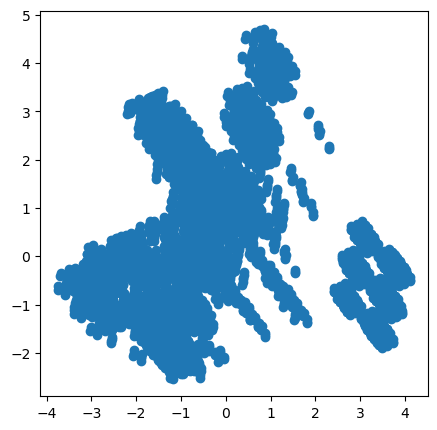

In [ ]:
# N=X_temp.values
pca = PCA(n_components=12)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 0.9114

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2478
           1       0.94      0.88      0.91      2396

    accuracy                           0.91      4874
   macro avg       0.91      0.91      0.91      4874
weighted avg       0.91      0.91      0.91      4874


Confusion Matrix:
[[2341  137]
 [ 295 2101]]

Average Accuracy:	0.9118

Standard Deviation:	0.0110


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9031

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1730
           1       0.94      0.85      0.89      1520

    accuracy                           0.90      3250
   macro avg       0.91      0.90      0.90      3250
weighted avg       0.91      0.90      0.90      3250


Confusion Matrix:
[[1641   89]
 [ 226 1294]]



### ANN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
488/488 [==============================] - 1s 2ms/step - loss: 0.7294 - accuracy: 0.6301 - val_loss: 0.5169 - val_accuracy: 0.8535
Epoch 2/25
488/488 [==============================] - 1s 1ms/step - loss: 0.4076 - accuracy: 0.8941 - val_loss: 0.3457 - val_accuracy: 0.9034
Epoch 3/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2985 - accuracy: 0.9144 - val_loss: 0.2735 - val_accuracy: 0.9175
Epoch 4/25
488/488 [========

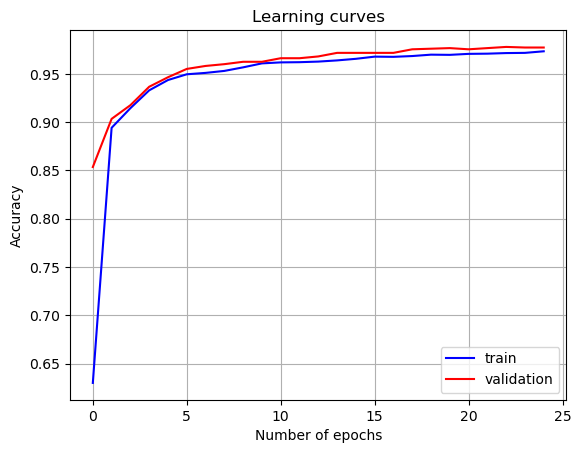

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.0763
Test accuracy: 96.62


51/51 [==============================] - 0s 799us/step


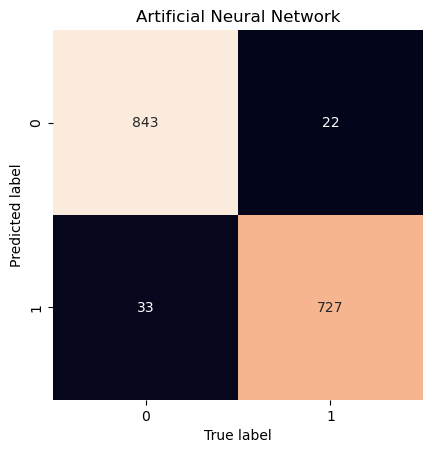

In [ ]:
# Create a function which takes a model and prints various evaluation metrics

import seaborn as sns
from sklearn import metrics

def evaluate(mlp, titlemsg):
  y_predicted = mlp.predict(X_test)
  y_predicted = y_predicted > 0.5
  mat = metrics.confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title(titlemsg)
evaluate(model, "Artificial Neural Network")

### K Nearest Mean

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

### Decision Tree

### Naive Bayes

### Random Forest

### N = 17

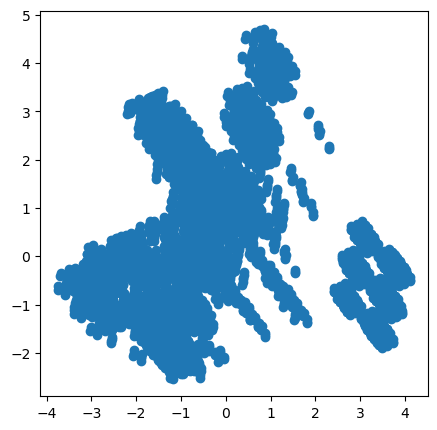

In [ ]:
# N=X_temp.values
pca = PCA(n_components=17)
x = pca.fit_transform(X_temp)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y,test_size=0.4,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
print_score(classifier,X_train,y_train,X_rem,y_rem,train=True)

Training results:

Accuracy Score: 0.9510

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2478
           1       0.96      0.94      0.95      2396

    accuracy                           0.95      4874
   macro avg       0.95      0.95      0.95      4874
weighted avg       0.95      0.95      0.95      4874


Confusion Matrix:
[[2372  106]
 [ 133 2263]]

Average Accuracy:	0.9497

Standard Deviation:	0.0095


In [ ]:
print_score(classifier,X_train,y_train,X_rem,y_rem,train=False)

Test results:

Accuracy Score: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1730
           1       0.95      0.92      0.94      1520

    accuracy                           0.94      3250
   macro avg       0.94      0.94      0.94      3250
weighted avg       0.94      0.94      0.94      3250


Confusion Matrix:
[[1658   72]
 [ 115 1405]]



### ANN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
488/488 [==============================] - 1s 1ms/step - loss: 0.5600 - accuracy: 0.6933 - val_loss: 0.3815 - val_accuracy: 0.8560
Epoch 2/25
488/488 [==============================] - 1s 1ms/step - loss: 0.2643 - accuracy: 0.9169 - val_loss: 0.2106 - val_accuracy: 0.9354
Epoch 3/25
488/488 [==============================] - 1s 1ms/step - loss: 0.1669 - accuracy: 0.9528 - val_loss: 0.1559 - val_accuracy: 0.9557
Epoch 4/25
488/488 [========

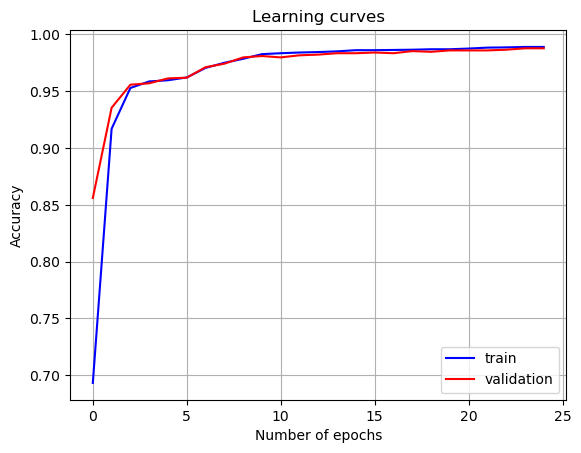

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier = Sequential()
import time

model = Sequential()

model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val), batch_size = 10, verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.0331
Test accuracy: 98.22


51/51 [==============================] - 0s 696us/step


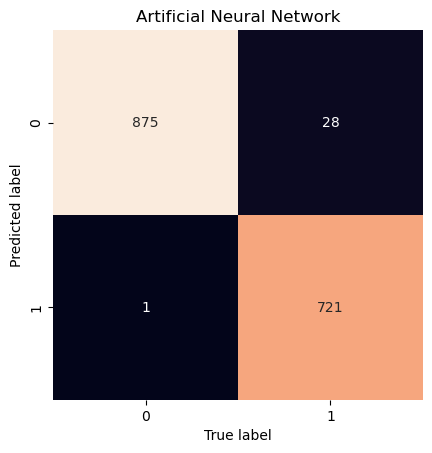

In [ ]:
# Create a function which takes a model and prints various evaluation metrics

import seaborn as sns
from sklearn import metrics

def evaluate(mlp, titlemsg):
  y_predicted = mlp.predict(X_test)
  y_predicted = y_predicted > 0.5
  mat = metrics.confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title(titlemsg)
evaluate(model, "Artificial Neural Network")

### K Nearest Means

### Decision Tree

### Naive Bayes

### Random Forest

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



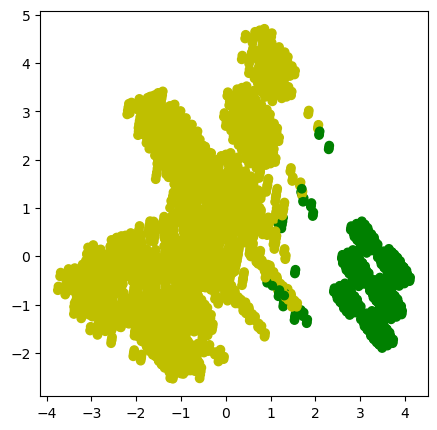

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(X_temp)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

## DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=13, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, random_state=0)

[Text(0.7313193044354839, 0.9642857142857143, 'x[0] <= 2.364\ngini = 0.5\nsamples = 4874\nvalue = [2478, 2396]'),
 Text(0.7151902721774194, 0.8928571428571429, 'x[2] <= 0.835\ngini = 0.456\nsamples = 3825\nvalue = [2478, 1347]'),
 Text(0.5604208669354839, 0.8214285714285714, 'x[4] <= 0.388\ngini = 0.314\nsamples = 2792\nvalue = [2247, 545]'),
 Text(0.29926915322580644, 0.75, 'x[0] <= -1.774\ngini = 0.458\nsamples = 1363\nvalue = [879, 484]'),
 Text(0.08064516129032258, 0.6785714285714286, 'x[4] <= -0.419\ngini = 0.07\nsamples = 411\nvalue = [396, 15]'),
 Text(0.06451612903225806, 0.6071428571428571, 'x[5] <= -0.723\ngini = 0.015\nsamples = 399\nvalue = [396, 3]'),
 Text(0.03225806451612903, 0.5357142857142857, 'x[5] <= -0.876\ngini = 0.005\nsamples = 391\nvalue = [390, 1]'),
 Text(0.016129032258064516, 0.4642857142857143, 'gini = 0.0\nsamples = 378\nvalue = [378, 0]'),
 Text(0.04838709677419355, 0.4642857142857143, 'x[5] <= -0.875\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0

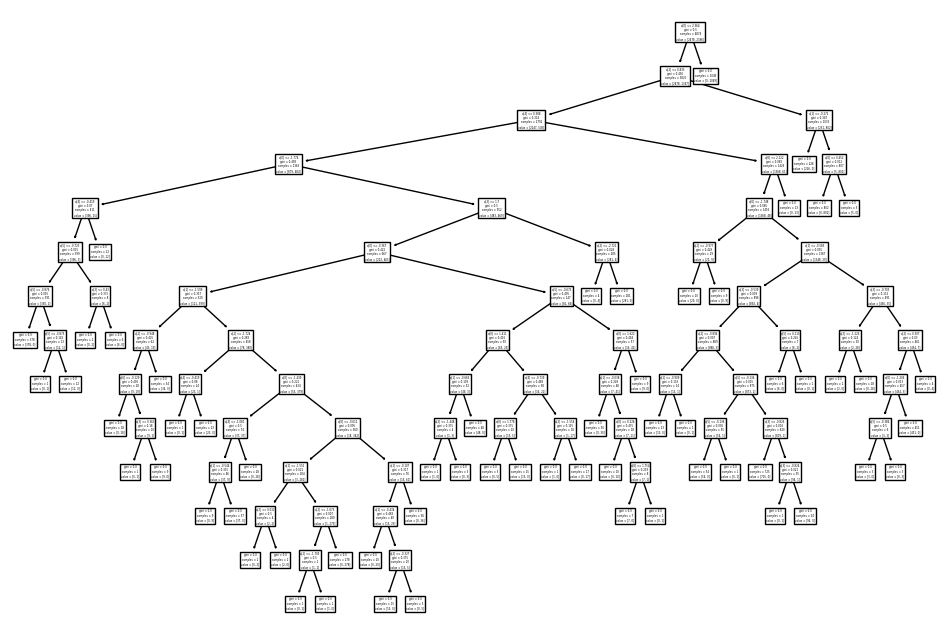

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion entropy: 0.9858
Training-set accuracy score: 1.0000


With max_dept = 10<br>
Model accuracy score with criterion entropy: 0.9852<br>
Training-set accuracy score: 0.9932<br>
<br>
<br>
With max_depth = 15<br>
Model accuracy score with criterion entropy: 0.9858<br>
Training-set accuracy score: 1.0000<br>
<br>
<br>
With max_depth = 20 <br>
Model accuracy score with criterion entropy: 0.9858 <br>
Training-set accuracy score: 1.0000 <br>
<br>
<br>
With gini, <br>
depth = 10 <br>
Model accuracy score with criterion gini index: 0.9865 <br>
Training-set accuracy score: 0.9941 <br>
<br> 
For depth = 20,15 , we get same result as for entropy

## NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [ ]:
print("Test Accuracy: {}%".format(round(nb.score(X_test,y_test)*100,2)))


Test Accuracy: 89.72%
